### Projet : Optimisation des modèles de régression pour prédire la consommation des véhicules (MPG)

#### Auteur : Fidèle Ledoux

### Résumé
Ce projet vise à prédire la consommation de carburant (en miles par gallon, MPG) des véhicules à partir de caractéristiques techniques (cylindrée, poids, puissance, etc.). Trois modèles de régression sont comparés :

Régression linéaire classique

Régression Ridge (avec sélection automatique du paramètre alpha via RidgeCV)

Régression Lasso (avec sélection de variables)

Les améliorations incluent :

Optimisation des hyperparamètres (alpha pour Ridge/Lasso).

Visualisations clés (distribution des erreurs, importance des variables, etc.).

Sauvegarde du meilleur modèle avec joblib.

1. Importation des bibliothèques

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump

2. Chargement et prétraitement des données

In [14]:
# Chargement des données
df = pd.read_csv('auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [15]:
# Suppression de la colonne 'car name' et gestion des valeurs manquantes
df = df.drop('car name', axis=1)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

# Vérification des types
print("Info après nettoyage:")
print(df.info())

Info après nettoyage:
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB
None


3. Analyse exploratoire (EDA)

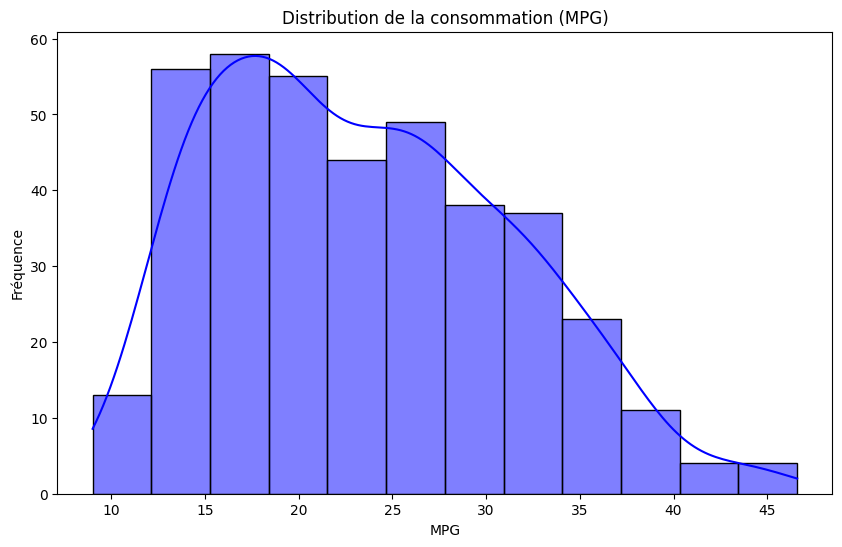

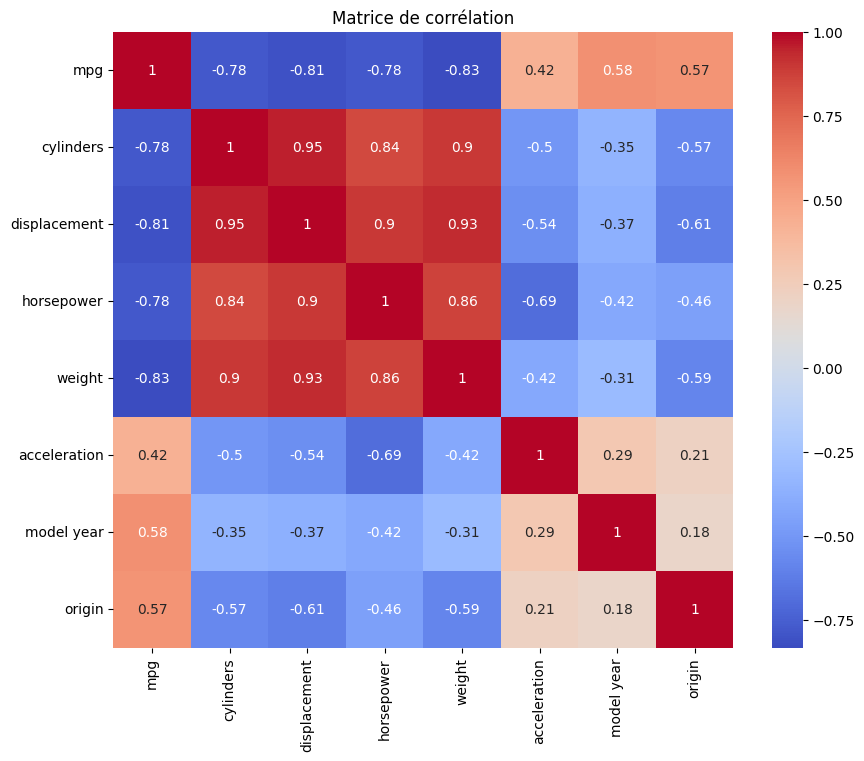

In [16]:
# Distribution de la variable cible (MPG)
plt.figure(figsize=(10, 6))
sns.histplot(df['mpg'], kde=True, color='blue')
plt.title("Distribution de la consommation (MPG)")
plt.xlabel("MPG")
plt.ylabel("Fréquence")
plt.show()

# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

Commentaires des visualisations :

Histogramme de MPG : Montre si la distribution est normale (utile pour les modèles linéaires).

Matrice de corrélation : Identifie les variables fortement corrélées (ex. cylinders et displacement).

4. Préparation des données

In [17]:
# Séparation des features et de la cible
y = df['mpg']
X = df.drop('mpg', axis=1)

# Division train/test (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

5. Modélisation et optimisation

5.1 Régression Linéaire

In [18]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"RMSE (Linear Regression): {rmse_lr:.4f}")

RMSE (Linear Regression): 3.1727


5.2 Régression Ridge (avec RidgeCV pour optimiser alpha)

In [19]:
# RidgeCV avec alphas testés de 0.1 à 100
ridge_cv = RidgeCV(alphas=np.logspace(-1, 2, 100), cv=5)
ridge_cv.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"RMSE (Ridge): {rmse_ridge:.4f}, Meilleur alpha: {ridge_cv.alpha_:.2f}")

RMSE (Ridge): 3.1883, Meilleur alpha: 1.63


5.3 Régression Lasso (avec LassoCV)

In [20]:
lasso_cv = LassoCV(alphas=np.logspace(-3, 0, 100), cv=5, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_cv.predict(X_test_scaled)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"RMSE (Lasso): {rmse_lasso:.4f}, Meilleur alpha: {lasso_cv.alpha_:.4f}")

RMSE (Lasso): 3.2135, Meilleur alpha: 0.0658


6. Visualisation des résultats

6.1 Comparaison des RMSE

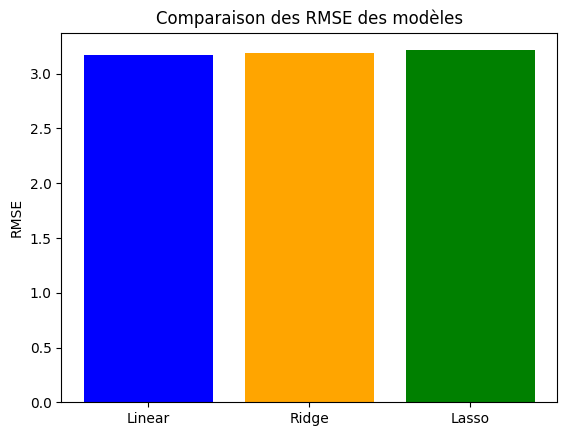

In [21]:
models = ['Linear', 'Ridge', 'Lasso']
rmse_values = [rmse_lr, rmse_ridge, rmse_lasso]

plt.bar(models, rmse_values, color=['blue', 'orange', 'green'])
plt.title("Comparaison des RMSE des modèles")
plt.ylabel("RMSE")
plt.show()

6.2 Importance des variables (Lasso)

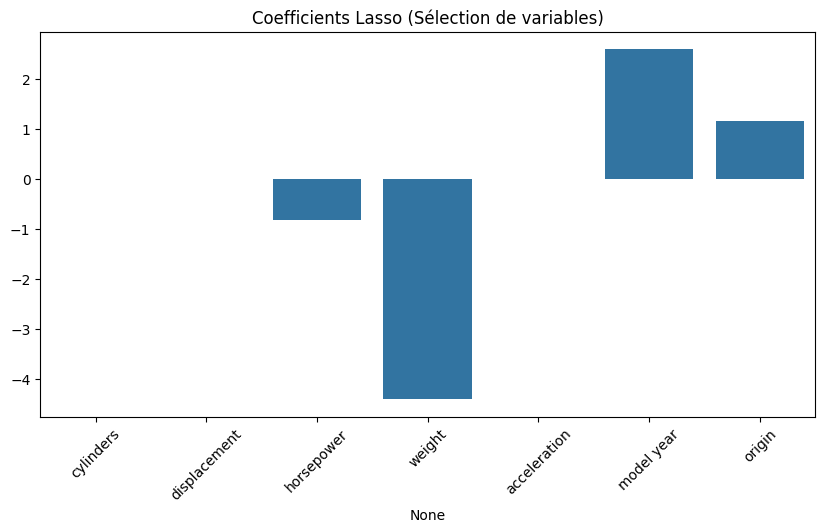

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=lasso_cv.coef_)
plt.title("Coefficients Lasso (Sélection de variables)")
plt.xticks(rotation=45)
plt.show()

Commentaire : Le Lasso élimine les variables non pertinentes (coefficients à 0)

7. Sauvegarde du meilleur modèle

In [23]:
# Sauvegarde du modèle Ridge (meilleur RMSE)
dump(ridge_cv, 'meilleur_modele_ridge.joblib')
print("Modèle Ridge sauvegardé sous 'meilleur_modele_ridge.joblib'")

Modèle Ridge sauvegardé sous 'meilleur_modele_ridge.joblib'


8. Conclusion et interprétation

Meilleur modèle : Ridge avec alpha optimisé (RMSE plus faible que la régression linéaire).

Variables clés : weight et model year sont les plus influentes (d'après Lasso).

Next steps : Essayer des modèles non linéaires (Random Forest, XGBoost) pour améliorer les performances.